### Stock Price Prediction using LSTM

In [1]:
# importing few required libraries

import numpy as np
import pandas as pd
import investpy
import matplotlib.pyplot as plt

In [2]:
# Data collection from investpy
df1 = investpy.get_stock_historical_data(stock='MRTI', country='India', from_date='01/01/2010', to_date='31/12/2019')

In [3]:
# Creating and Training and test sets
X=df1[['Open','High']]
y=df1['Close']

# print(len(X))
length=100

training_set = X.iloc[:1500].values
test_set = X.iloc[1500:].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)

# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(length, len(training_set)):
    X_train.append(training_set_scaled[i-length:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
y_test = []

for i in range(length, len(test_set)):
    X_test.append(test_set_scaled[i-length:i, 0])
    y_test.append(test_set_scaled[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [4]:
# Creating LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
# model.add(Dropout(0.2))

model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 50, batch_size = 32)

Epoch 1/50
44/44 [==============================] - 18s 226ms/step - loss: 0.0429 - val_loss: 0.2199
Epoch 2/50
44/44 [==============================] - 6s 142ms/step - loss: 9.5771e-04 - val_loss: 0.2211
Epoch 3/50
44/44 [==============================] - 6s 127ms/step - loss: 0.0011 - val_loss: 0.2043
Epoch 4/50
44/44 [==============================] - 5s 125ms/step - loss: 9.1377e-04 - val_loss: 0.1730
Epoch 5/50
44/44 [==============================] - 6s 129ms/step - loss: 0.0013 - val_loss: 0.2048
Epoch 6/50
44/44 [==============================] - 6s 129ms/step - loss: 0.0010 - val_loss: 0.1824
Epoch 7/50
44/44 [==============================] - 6s 135ms/step - loss: 8.6996e-04 - val_loss: 0.1518
Epoch 8/50
44/44 [==============================] - 6s 131ms/step - loss: 8.9888e-04 - val_loss: 0.1876
Epoch 9/50
44/44 [==============================] - 6s 130ms/step - loss: 9.6116e-04 - val_loss: 0.1768
Epoch 10/50
44/44 [==============================] - 6s 129ms/step - loss: 8.49

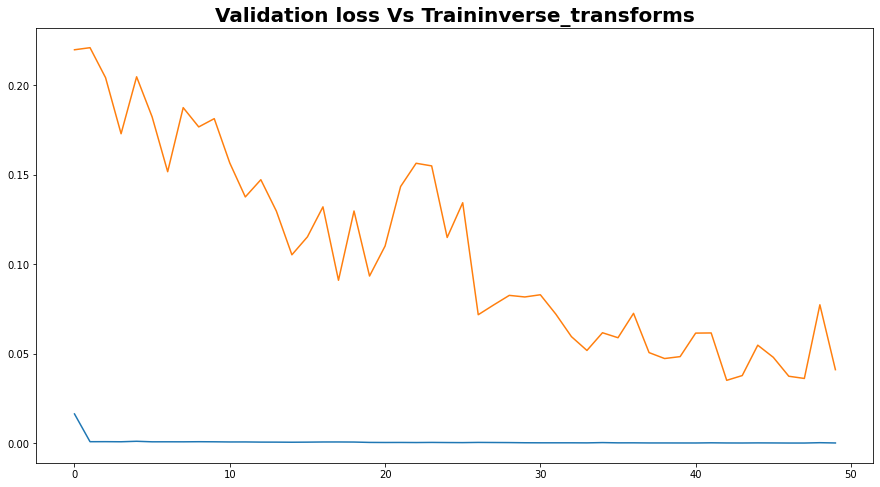

In [5]:
loss = pd.DataFrame(model.history.history)
fig = plt.figure(figsize=(15,8))
plt.title("Validation loss Vs Traininverse_transforms", size=20, weight='bold')
plt.plot(loss)

In [6]:
# Predicting on the data
pred = model.predict(X_test)
test = pd.DataFrame(columns=['test','pred'])
test['test'] = y_test
test['pred'] = pred.flatten()
test

,test,pred
0,0.827389,0.836943
1,0.845610,0.826788
2,0.845348,0.833381
3,0.847158,0.840101
4,0.821210,0.843121
...,...,...
867,1.698566,1.510712
868,1.682037,1.530737
869,1.664721,1.519531
870,1.693581,1.510694


Text(500, 1.25, 'Mean Absolute error : 0.04')

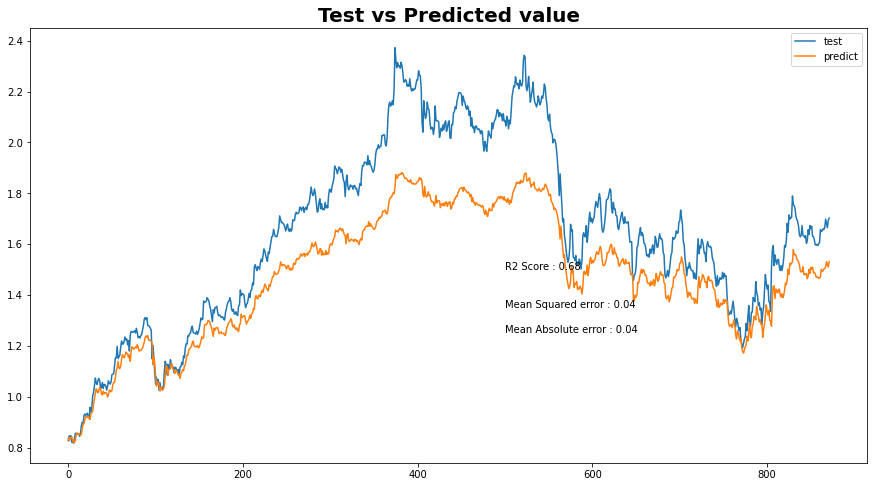

In [7]:
# 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
fig = plt.figure(figsize=(15,8))
plt.title("Test vs Predicted value", size=20, weight='bold')
plt.plot(test)
plt.legend(['test','predict'])
r2 = np.round(r2_score(y_test,pred),2)
mse = np.round(mean_squared_error(y_test,pred),2)
mae = np.round(mean_squared_error(y_test,pred),2)
plt.text(x=500, y=1.5,s='R2 Score : {}'.format(r2))
plt.text(x=500, y=1.35,s='Mean Squared error : {}'.format(mse))
plt.text(x=500, y=1.25,s='Mean Absolute error : {}'.format(mae))